In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

T_dataset = pd.read_csv("/home/sa42/data/glac/T_models/T.csv")
TT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TT.csv")
TTT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TTT.csv")

# T_dataset = pd.read_csv("~/stuff/coding/glacier/data/T.csv")
# TT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TT.csv")
# TTT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TTT.csv")

T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)
T_dataset = T_dataset.dropna()

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)
TT_dataset = TT_dataset.dropna()

TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)
TTT_dataset = TTT_dataset.dropna()

T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT",
                    "LON":"LON_CENT",
                    "AREA":"T_AREA"},
         inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND",
                     "UPPER_BOUND":"TT_UPPER_BOUND",
                     "AREA":"TT_AREA",
                     "MEAN_SLOPE":"TT_MEAN_SLOPE",
                     "MEAN_THICKNESS":"TT_MEAN_THICKNESS"},
          inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION",
                      "THICKNESS":"POINT_THICKNESS"},
           inplace = True)

TTT_plu = pd.merge(T, TTT, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])
# TTT_plus.dropna()

TTT_plus = TTT_plus.drop("GlaThiDa_ID",axis=1)
# TTT_plus = TTT_plus.drop("TT_MEAN_THICKNESS",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LON",axis=1)
# TTT_plus = TTT_plus.drop("POINT_ELEVATION",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
# TTT_plus = TTT_plus.drop("POINT_LAT",axis=1)
TTT_plus

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,TT_MEAN_THICKNESS,LAT_CENT,LON_CENT,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_THICKNESS
0,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960842,9.390133,2624.0,15
1,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960844,9.390126,2625.0,15
2,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960847,9.390118,2625.0,15
3,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960849,9.390111,2625.0,14
4,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960851,9.390103,2624.0,14
...,...,...,...,...,...,...,...,...,...,...,...
166422,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235309,97.762576,4780.0,90
166423,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235217,97.762203,4780.0,101
166424,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235171,97.761845,4780.0,106
166425,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235114,97.761459,4782.0,112


In [4]:
#split the dataset into test and train data sets.
train_dataset = TTT_plus.sample(frac=0.8, random_state=1)
test_dataset = TTT_plus.drop(train_dataset.index)

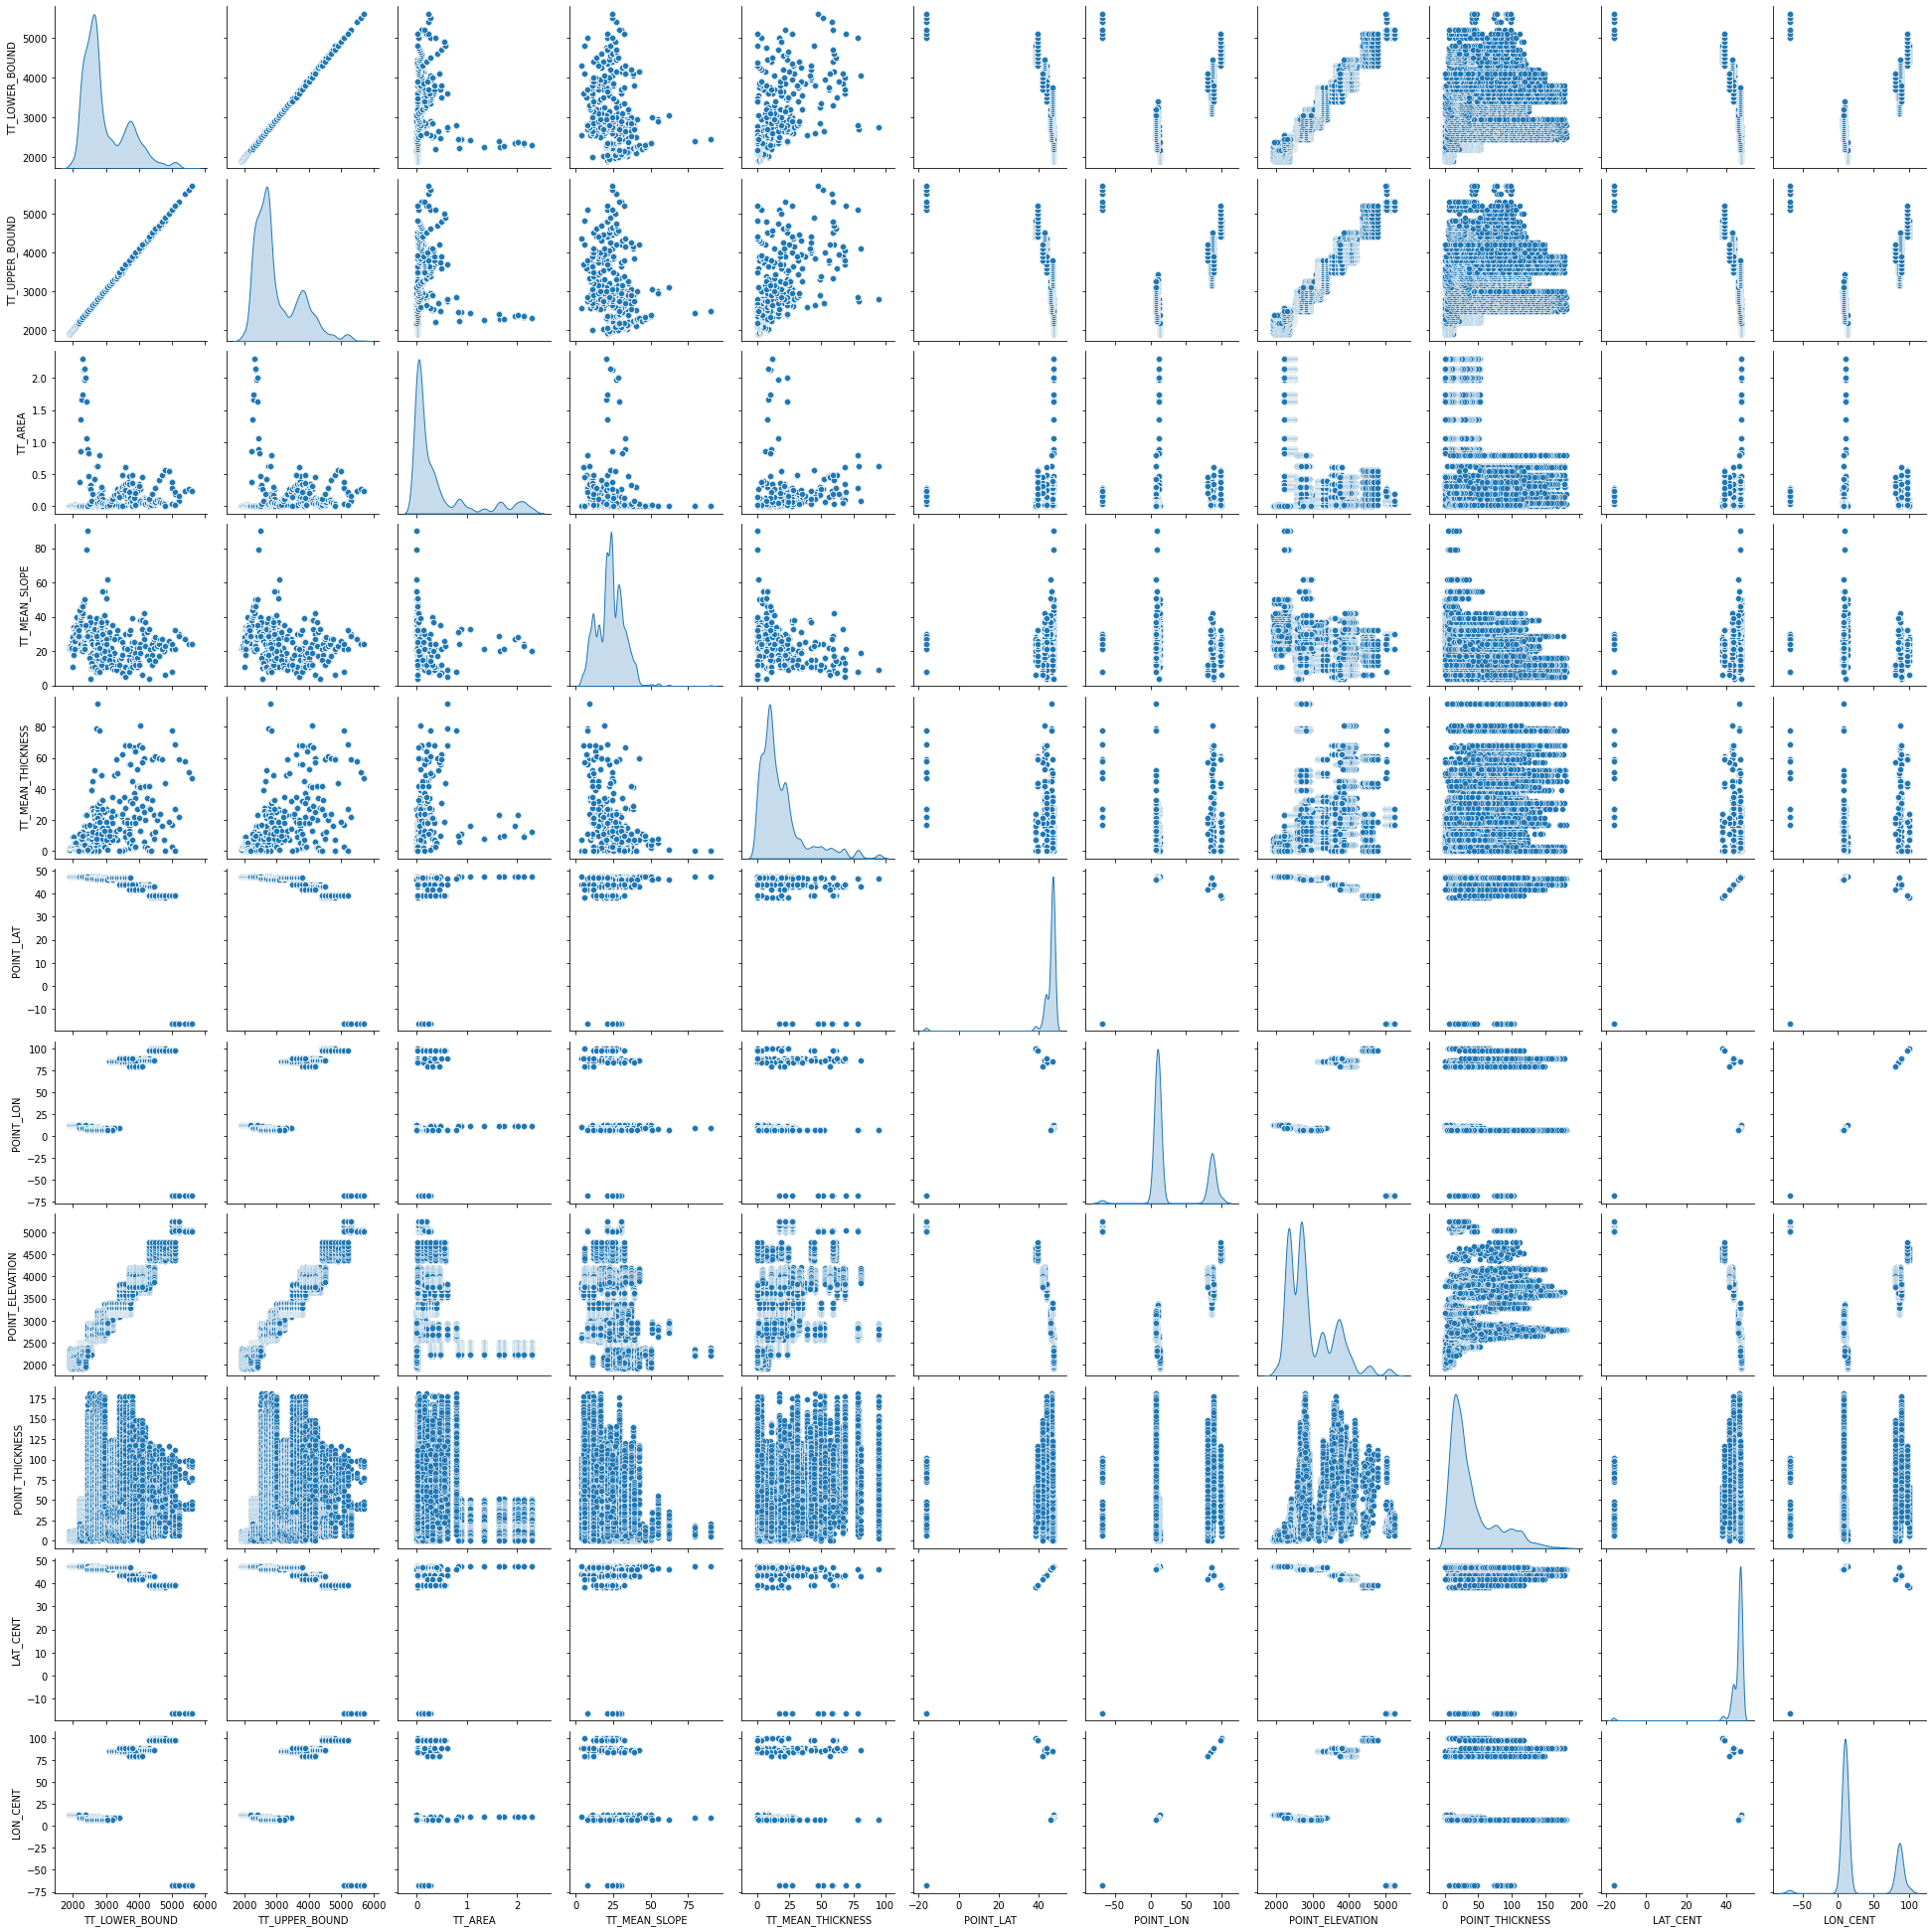

In [5]:
sns.pairplot(test_dataset[["TT_LOWER_BOUND",
                            "TT_UPPER_BOUND",
                            "TT_AREA",
                            "TT_MEAN_SLOPE",
                            "TT_MEAN_THICKNESS",
                            "POINT_LAT",
                            "POINT_LON",
                            "POINT_ELEVATION",
                            "POINT_THICKNESS",
                            "LAT_CENT",
                            "LON_CENT"]],
             diag_kind='kde')

In [6]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("POINT_THICKNESS")
test_labels = test_features.pop("POINT_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
TT_LOWER_BOUND,2955.358249,678.468683
TT_UPPER_BOUND,2997.584699,693.106394
TT_AREA,0.422969,0.635959
TT_MEAN_SLOPE,23.090475,9.025714
TT_MEAN_THICKNESS,18.129786,17.766370
LAT_CENT,45.256273,7.522679
LON_CENT,29.987470,36.351443
POINT_LAT,45.256439,7.523287
POINT_LON,29.988477,36.350408
POINT_ELEVATION,2929.301723,649.223606


In [7]:
#establish normalization layers
normalizer = {}
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

2022-03-15 12:57:13.176484: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-15 12:57:13.176597: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sermeq.ess.washington.edu): /proc/driver/nvidia/version does not exist
2022-03-15 12:57:13.177141: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [9]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [10]:
%%time
for variable_name in tqdm(variable_list):

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

100%|██████████| 10/10 [28:29<00:00, 170.96s/it]

CPU times: user 36min 15s, sys: 2min 34s, total: 38min 50s
Wall time: 28min 29s


{'TT_LOWER_BOUND': 20.663785934448242,
 'TT_UPPER_BOUND': 20.6766414642334,
 'TT_AREA': 23.564220428466797,
 'TT_MEAN_THICKNESS': 20.542146682739258,
 'TT_MEAN_SLOPE': 22.376829147338867,
 'POINT_LAT': 23.573270797729492,
 'POINT_LON': 19.265165328979492,
 'POINT_ELEVATION': 20.29156494140625,
 'LAT_CENT': 23.573284149169922,
 'LON_CENT': 19.265193939208984}

In [11]:
for variable_name in variable_list:    
    df = pd.DataFrame(linear_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


          Variable       loss  val_loss
99  TT_LOWER_BOUND  20.805172   20.6504

          Variable       loss   val_loss
99  TT_UPPER_BOUND  20.819088  20.661234

   Variable       loss  val_loss
99  TT_AREA  23.660854  23.42659

             Variable       loss  val_loss
99  TT_MEAN_THICKNESS  20.686754  20.52125

         Variable       loss   val_loss
99  TT_MEAN_SLOPE  22.500849  22.202467

     Variable       loss   val_loss
99  POINT_LAT  23.676596  23.444706

     Variable       loss   val_loss
99  POINT_LON  19.410774  19.159512

           Variable       loss   val_loss
99  POINT_ELEVATION  20.423632  20.224724

    Variable       loss   val_loss
99  LAT_CENT  23.676729  23.445002

    Variable       loss   val_loss
99  LON_CENT  19.410519  19.159519



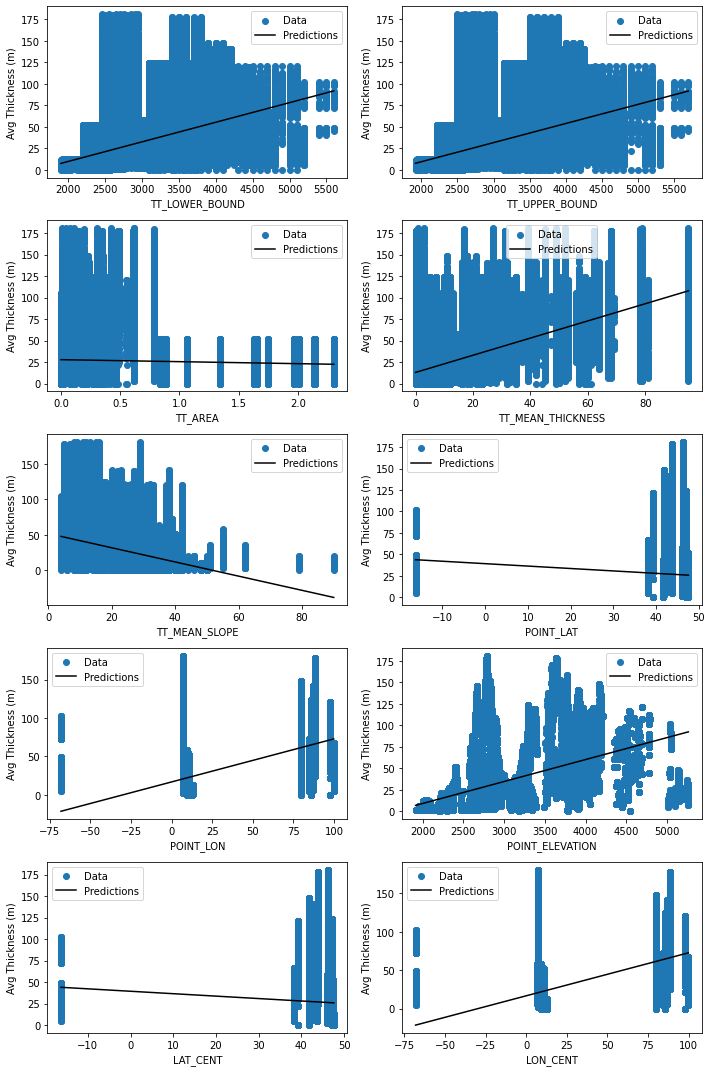

In [12]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)
plt.tight_layout()

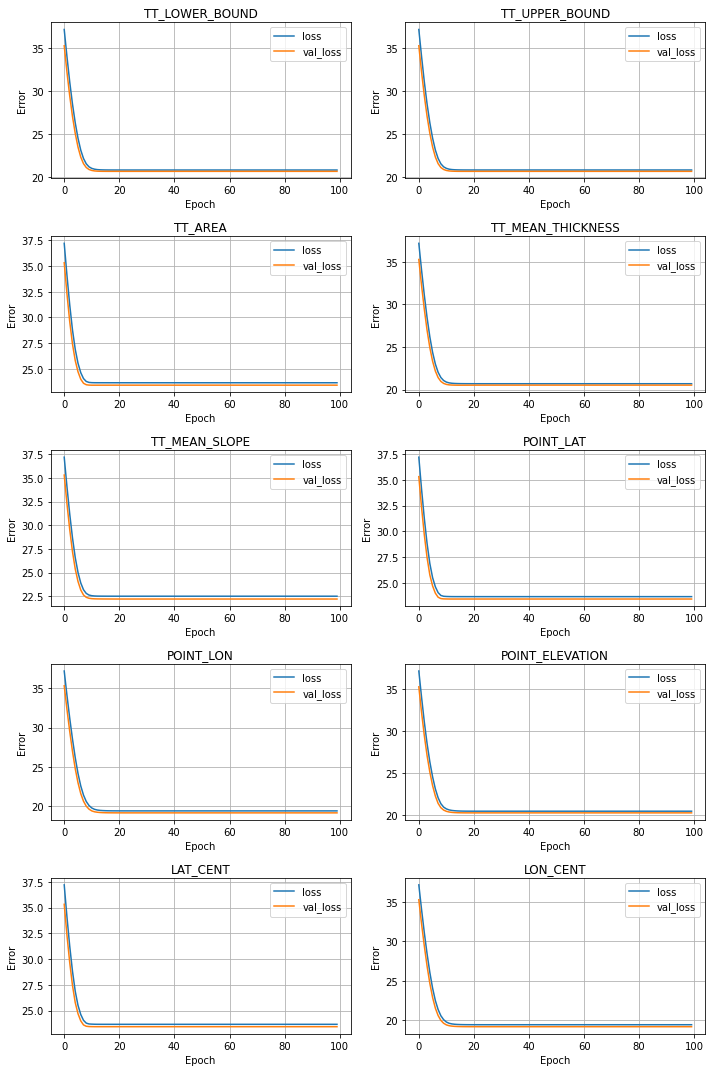

In [13]:
fig,ax=plt.subplots(8,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    ax = plt.subplot(5,2,i+1)

    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])
    ax.set_title(variable_name)

plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_loss.eps")

In [14]:
%%time
linear_model = build_linear_model(normalizer['ALL'])
linear_history_full = linear_model.fit(
train_features, train_labels,        
   epochs=100,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

CPU times: user 3min 47s, sys: 17.3 s, total: 4min 5s
Wall time: 2min 55s


{'MULTI': 17.35424041748047}

In [15]:
df = pd.DataFrame(linear_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable      loss   val_loss
99  Multi-Variable  17.50889  17.335484



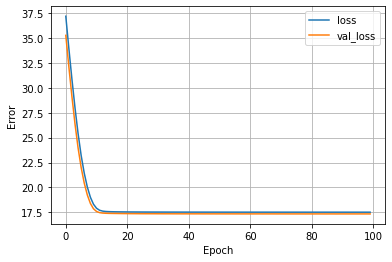

In [16]:
plot_loss(linear_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_full_loss.eps")

In [17]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [18]:
dnn_test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}
dnn_history_full = {}

In [19]:
%%time
for variable_name in tqdm(variable_list):

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

100%|██████████| 10/10 [55:32<00:00, 333.29s/it]

CPU times: user 7h 15min 19s, sys: 1h 52min 44s, total: 9h 8min 4s
Wall time: 55min 32s


{'TT_LOWER_BOUND': 18.80229377746582,
 'TT_UPPER_BOUND': 18.974044799804688,
 'TT_AREA': 20.37395477294922,
 'TT_MEAN_THICKNESS': 19.28484344482422,
 'TT_MEAN_SLOPE': 20.383087158203125,
 'POINT_LAT': 19.13559341430664,
 'POINT_LON': 15.549781799316406,
 'POINT_ELEVATION': 16.289567947387695,
 'LAT_CENT': 18.483901977539062,
 'LON_CENT': 16.912778854370117}

In [20]:
for variable_name in variable_list:    
    df = pd.DataFrame(dnn_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")
    

          Variable       loss  val_loss
99  TT_LOWER_BOUND  18.863087  18.59761

          Variable      loss   val_loss
99  TT_UPPER_BOUND  18.98065  18.805632

   Variable       loss   val_loss
99  TT_AREA  20.551144  20.434662

             Variable     loss   val_loss
99  TT_MEAN_THICKNESS  19.4112  19.343647

         Variable       loss  val_loss
99  TT_MEAN_SLOPE  20.423483  20.38308

     Variable       loss   val_loss
99  POINT_LAT  19.175718  19.031864

     Variable       loss   val_loss
99  POINT_LON  15.503539  15.578311

           Variable       loss   val_loss
99  POINT_ELEVATION  16.336098  16.077169

    Variable       loss   val_loss
99  LAT_CENT  18.536774  18.437016

    Variable       loss   val_loss
99  LON_CENT  17.167982  16.897726



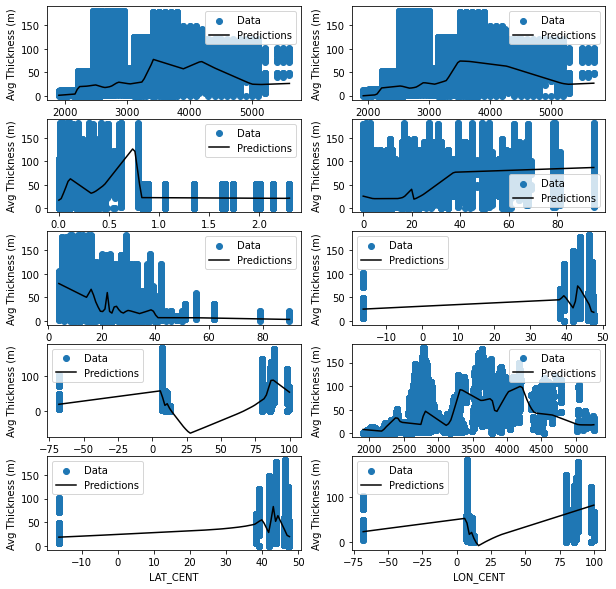

In [22]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

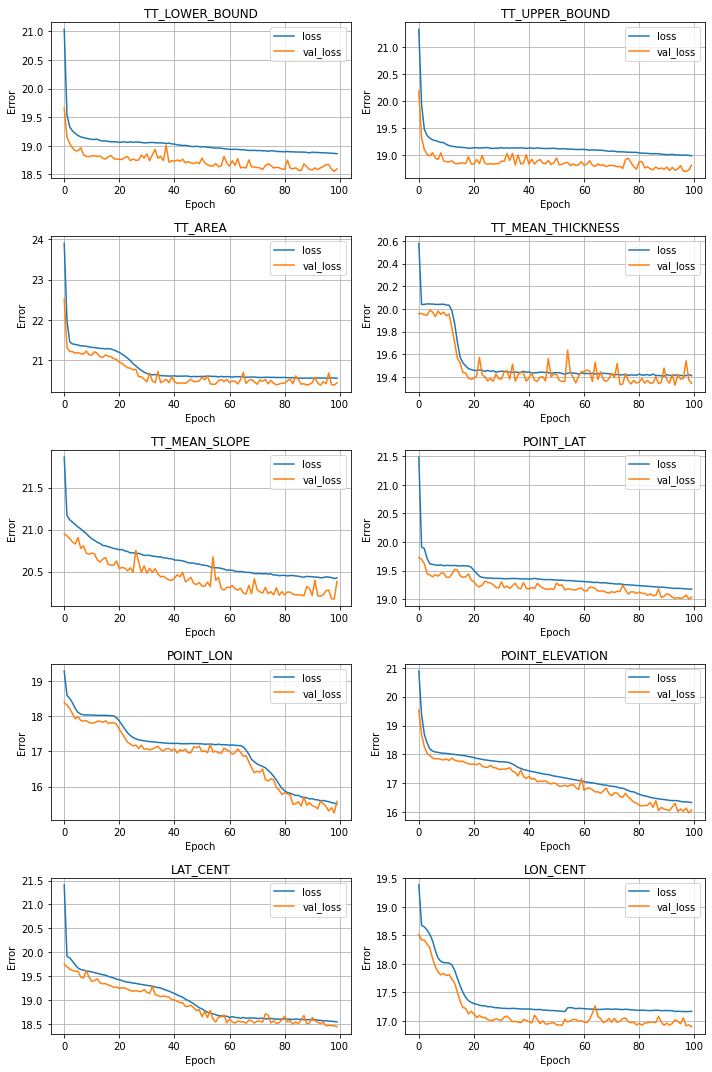

In [23]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    ax = plt.subplot(5,2,i+1)
    ax.set_title(variable_name)
    plot_loss(dnn_history[variable_name])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_loss.eps")
plt.tight_layout()

In [24]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [25]:
%%time
dnn_history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 40min 53s, sys: 11min 50s, total: 52min 44s
Wall time: 5min 34s


In [26]:
df = pd.DataFrame(dnn_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable      loss  val_loss
99  Multi-Variable  9.287566  9.137411



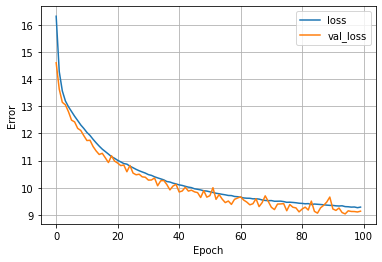

In [27]:
plot_loss(dnn_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_full_loss.eps")

In [28]:
dnn_test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

dnn_test_results


{'dnn_full_model': 9.294402122497559}

Text(0, 0.5, 'Model Thickness(m)')

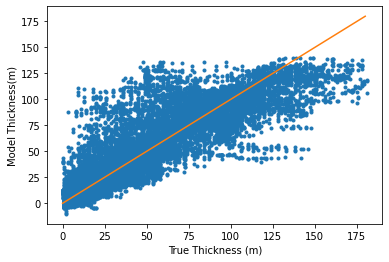

In [29]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,180),(0,180),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_res.EPS")

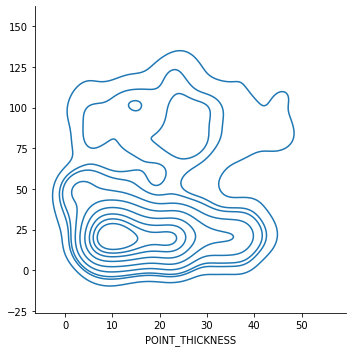

In [30]:
predictions = pd.Series(dnn_full_model.predict(test_features).flatten())
testy_testy_test = pd.concat([test_labels,predictions],axis=1)
sns.displot(testy_testy_test, x=test_labels, y=predictions, kind="kde")


In [31]:
RGI = pd.read_csv("/home/sa42/data/glac/glims/glims_extra/dump2/01_rgi60_Alaska.csv")
RGI = RGI.drop("RGIId", axis=1)
RGI = RGI.drop("GLIMSId", axis=1)
RGI = RGI.drop("BgnDate", axis=1)
RGI = RGI.drop("EndDate", axis=1)
RGI = RGI.drop("O1Region", axis=1)
RGI = RGI.drop("O2Region", axis=1)
# RGI = RGI.drop("Zmin", axis=1)
RGI = RGI.drop("Zmed", axis=1)
# RGI = RGI.drop("Zmax", axis=1)
RGI = RGI.drop("Aspect", axis=1)
RGI = RGI.drop("Lmax", axis=1)
RGI = RGI.drop("Status", axis=1)
RGI = RGI.drop("Connect", axis=1)
RGI = RGI.drop("Form", axis=1)
RGI = RGI.drop("TermType", axis=1)
RGI = RGI.drop("Surging", axis=1)
RGI = RGI.drop("Linkages", axis=1)
RGI = RGI.drop("Name", axis=1)
RGI.rename(columns = {"CenLon":"LON_CENT",
                      "CenLat":"LAT_CENT",
                      "Area":"TT_AREA",
                      "Slope":"TT_MEAN_SLOPE",
                      "Zmin":"TT_LOWER_BOUND",
                      "Zmax":"TT_UPPER_BOUND",},
           inplace = True)
RGI

,LON_CENT,LAT_CENT,TT_AREA,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_MEAN_SLOPE
0,-146.823000,63.689000,0.360,1936,2725,42.0
1,-146.668000,63.404000,0.558,1713,2144,16.0
2,-146.080000,63.376000,1.685,1609,2182,18.0
3,-146.120000,63.381000,3.681,1273,2317,19.0
4,-147.057000,63.551000,2.573,1494,2317,16.0
...,...,...,...,...,...,...
27103,-143.726807,60.231728,534.228,3,3238,10.0
27104,-143.084000,60.532000,0.515,2448,3034,40.0
27105,-129.512000,54.595900,3.564,980,1761,23.5
27106,-129.548000,54.620600,1.414,1314,1823,27.1


In [32]:
variable_list

('TT_LOWER_BOUND',
 'TT_UPPER_BOUND',
 'TT_AREA',
 'TT_MEAN_THICKNESS',
 'TT_MEAN_SLOPE',
 'POINT_LAT',
 'POINT_LON',
 'POINT_ELEVATION',
 'LAT_CENT',
 'LON_CENT')

In [33]:
normalizer['ALL'].adapt(np.array(RGI))
y_alaska_test = dnn_full_model.predict(RGI)


ValueError: in user code:

    File "/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/keras/engine/base_preprocessing_layer.py", line 118, in adapt_step  *
        self.update_state(data)
    File "/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/keras/layers/preprocessing/normalization.py", line 222, in update_state  **
        total_mean = self.adapt_mean * existing_weight + batch_mean * batch_weight

    ValueError: Dimensions must be equal, but are 10 and 6 for '{{node add_1}} = AddV2[T=DT_FLOAT](mul, mul_1)' with input shapes: [10], [6].


In [ ]:
RGI["Prethicktions"] = y_alaska_test
RGI